In [1]:
from google.colab import drive
drive.mount ('/content/drive/')

Mounted at /content/drive/


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import cv2, os

In [3]:
face_cascade = '/content/drive/My Drive/Colab Notebooks/haarcascade_frontalface_default.xml'
face_dataset = '/content/drive/My Drive/Colab Notebooks/dataset/yale/'

In [12]:
face_cascade

'/content/drive/My Drive/Colab Notebooks/haarcascade_frontalface_default.xml'

## **Frontal Dataset**
The Yale Face Database is used. 

The database contains 165 GIF images of 15 subjects (subject01, subject02, etc.).


There are 11 images per subject, one for each of the following facial expressions or configurations:
center-light, w/glasses, happy, left-light, w/no glasses, normal, right-light, sad, sleepy, surprised, and wink.


- Note that the image "subject04.sad" has been corrupted and has been substituted by "subject04.normal".


http://vision.ucsd.edu/content/yale-face-database

In [4]:
yalefaces_images = []
yalefaces_labels = []
yalefaces_paths = []

for element in os.listdir(face_dataset): # Loop through all elements in 'data' folder
    if element != 'Readme.txt': # Checks if we are in the right folder
        yalefaces_paths.append(os.path.join(face_dataset, element)) # Joins one or more path components. Returns value that's the concatenation of path and their members

for path in yalefaces_paths: # loops through all the elements in folder 'data'
    image = io.imread(path,as_gray = True) # Converts color image to gray-scale
    yalefaces_images.append(image) # Adds an image to the array
    label = int(os.path.split(path)[1].split(".")[0].replace("subject", ""))-1 # Separates 'subject' and removes expression
    yalefaces_labels.append(label)  

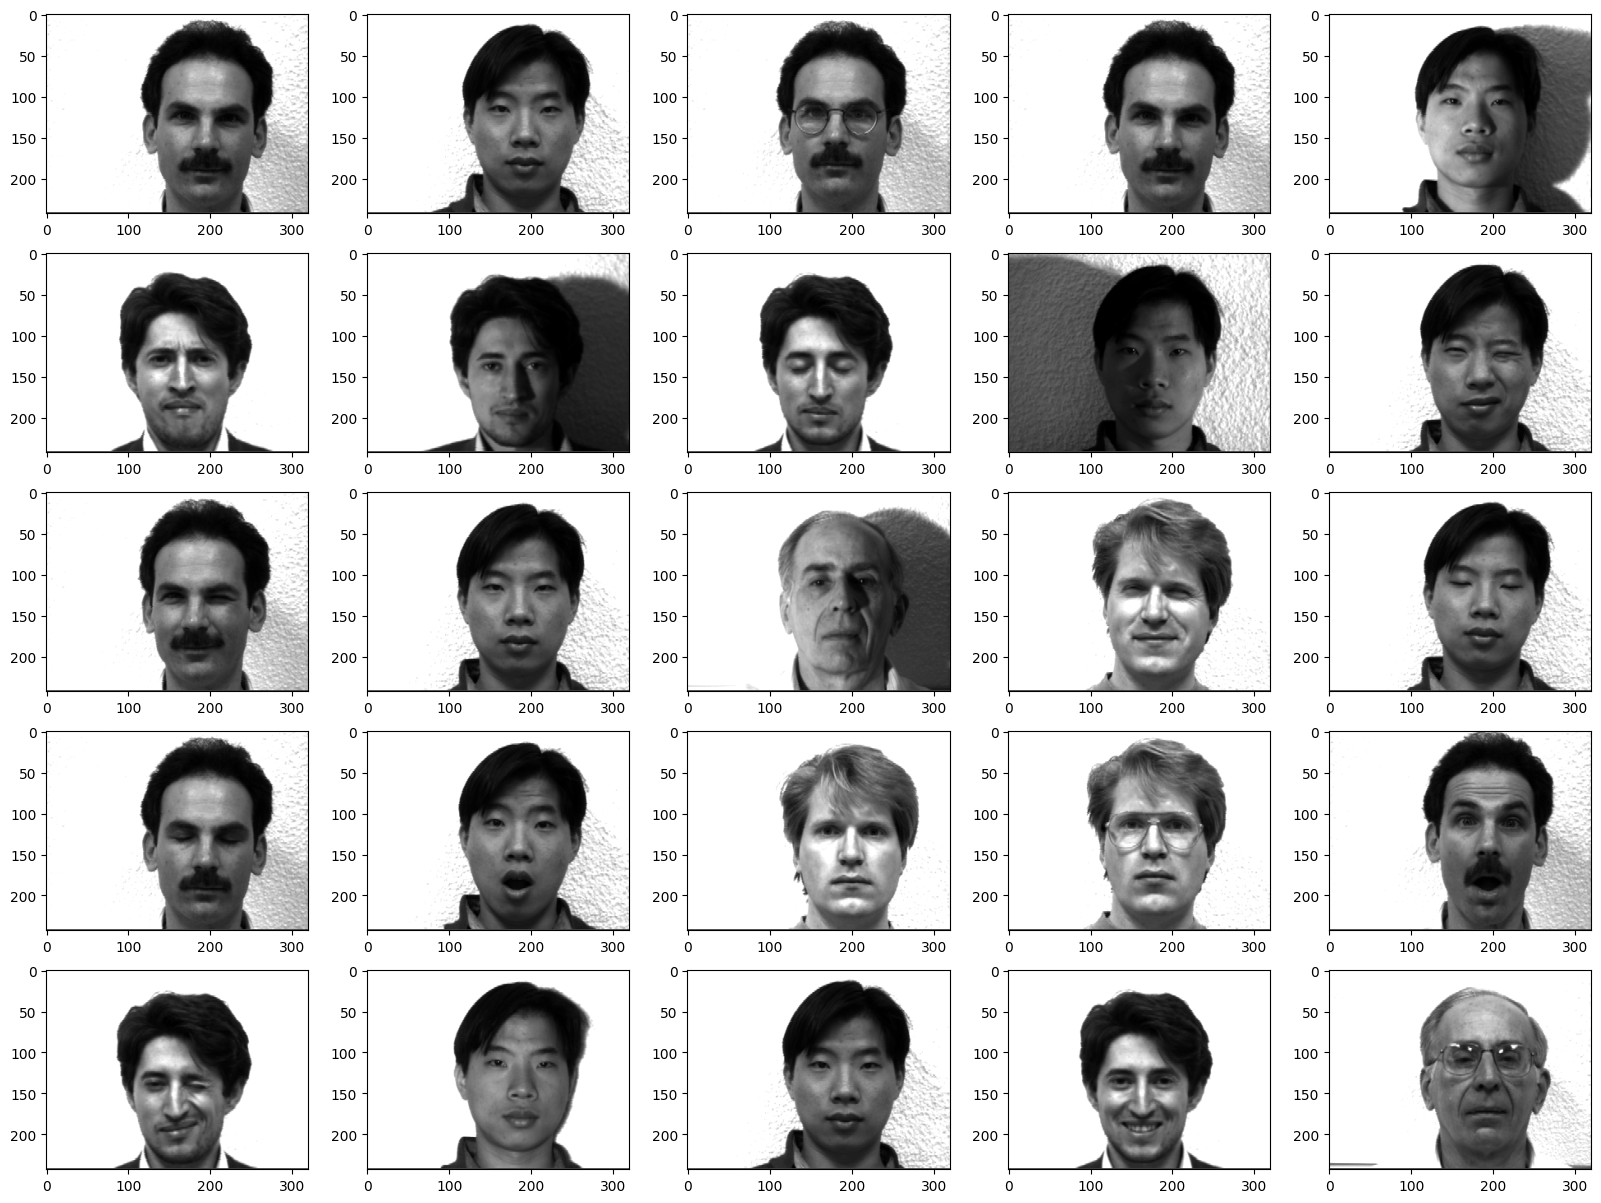

In [5]:
from pylab import *

fig = figure(figsize=(20, 15))

rows, columns = 5, 5
for i in range(0, rows*columns):
  fig.add_subplot(rows, columns, i+1)
  plt.imshow(yalefaces_images[i], cmap="gray")
  
plt.show()

In [10]:
face_detector = cv2.CascadeClassifier(face_cascade)
face_count = []

for i in range(len(yalefaces_images)):
    image = yalefaces_images[i]
    face = face_detector.detectMultiScale(image, 4, 6)
    if len(face) > 0:
        face_count.append(face)

In [11]:
print(f'HaarCascade found {str(len(face_count))} faces')

HaarCascade found 0 faces


In [8]:
img_with_detections = []

for images in range(len(yalefaces_images)):
    image = np.copy(yalefaces_images[images])
    img_with_detections.append(image)

In [9]:
for (x, y, w, h) in face_count: 
  cv2.rectangle(img_with_detections, (x, y), (x+w, y+h), (0, 0, 255), 5)

#plt.figure(figsize(20, 10))
plt.imshow(img_with_detections)

ValueError: ignored